In [1]:
import os
import numpy as np
import torch
from transformers import CLIPModel, CLIPProcessor
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image as IPyImage

e:\anaconda_set\envs\AIchallenge\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Đường dẫn đến thư mục chứa các file .npy đặc trưng
features_folder = "features/"
image_folder = "keyframes/"

In [3]:
# Tải mô hình CLIP và processor từ Hugging Face (Sử dụng CUDA nếu có GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained('clip_model/').to(device)
processor = CLIPProcessor.from_pretrained('clip_model/')

In [4]:
def text_to_features(text_list):
    inputs = processor(text=text_list, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
    return text_features.cpu().numpy()

# Hàm để nạp tất cả đặc trưng ảnh từ các file .npy
def load_image_features():
    all_image_features = []
    all_image_info = []
    
    # Duyệt qua tất cả các file trong thư mục features
    for file_name in os.listdir(features_folder):
        if file_name.endswith('.npy'):
            # Tên thư mục con
            folder_name = file_name.replace('.npy', '')
            # Nạp đặc trưng hình ảnh từ file .npy
            features_path = os.path.join(features_folder, file_name)
            features = np.load(features_path)
            
            # Thêm vào danh sách tất cả đặc trưng hình ảnh
            all_image_features.append(features)
            
            # Tạo thông tin ảnh từ tên thư mục và tên ảnh
            for i in range(features.shape[0]):  # Số lượng hình ảnh
                image_name = str(i)  # Chỉ sử dụng số thứ tự làm tên ảnh
                all_image_info.append((folder_name, image_name))
    
    # Chuyển đổi danh sách thành mảng numpy
    all_image_features = np.vstack(all_image_features)  # Nối tất cả đặc trưng ảnh lại thành một mảng
    return all_image_features, np.array(all_image_info)

# Nạp tất cả đặc trưng và thông tin ảnh
image_features, image_info = load_image_features()


Rank 1: Folder 'L05_V024', Image '65' with similarity score 0.3236
Image file 'keyframes/L05_V024\65.jpg' does not exist.
Rank 2: Folder 'L05_V024', Image '63' with similarity score 0.1857
Image file 'keyframes/L05_V024\63.jpg' does not exist.
Rank 3: Folder 'L05_V024', Image '64' with similarity score 0.1957
Image file 'keyframes/L05_V024\64.jpg' does not exist.
Rank 4: Folder 'L05_V024', Image '66' with similarity score 0.1671
Image file 'keyframes/L05_V024\66.jpg' does not exist.
Rank 5: Folder 'L05_V024', Image '67' with similarity score 0.1785
Image file 'keyframes/L05_V024\67.jpg' does not exist.
Rank 6: Folder 'L11_V007', Image '165' with similarity score 0.3135


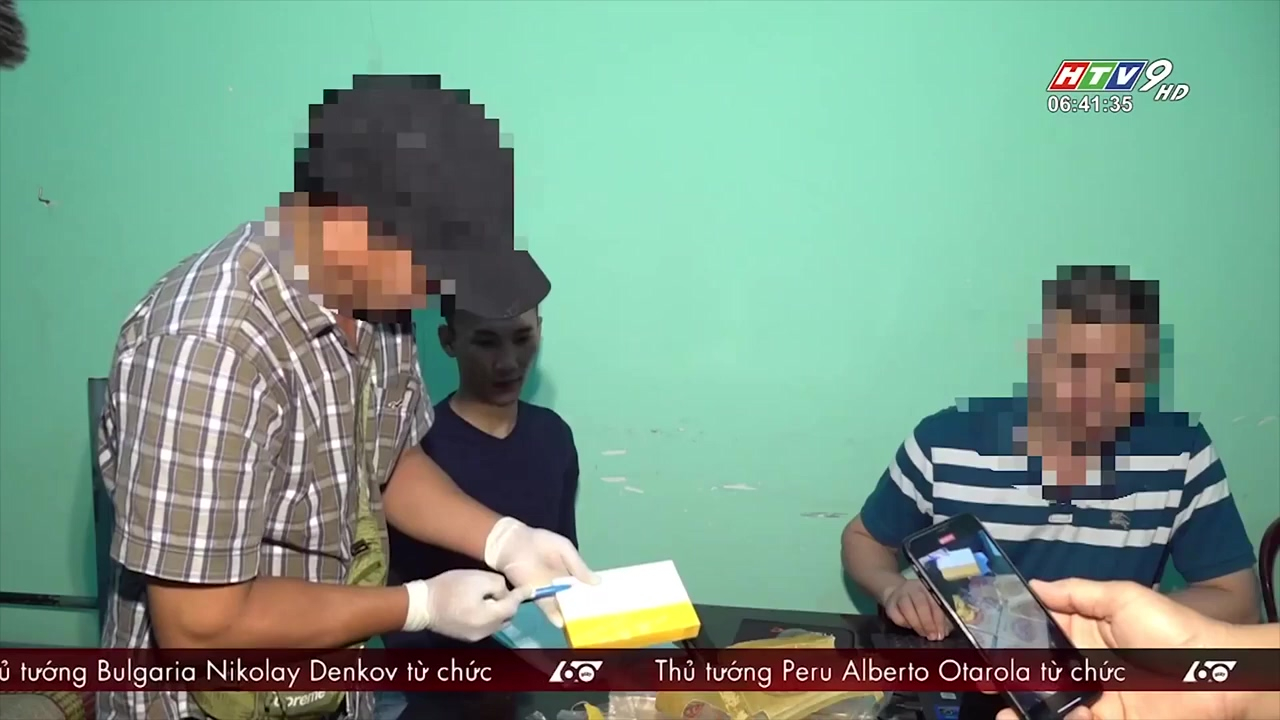

Rank 7: Folder 'L11_V007', Image '163' with similarity score 0.2493


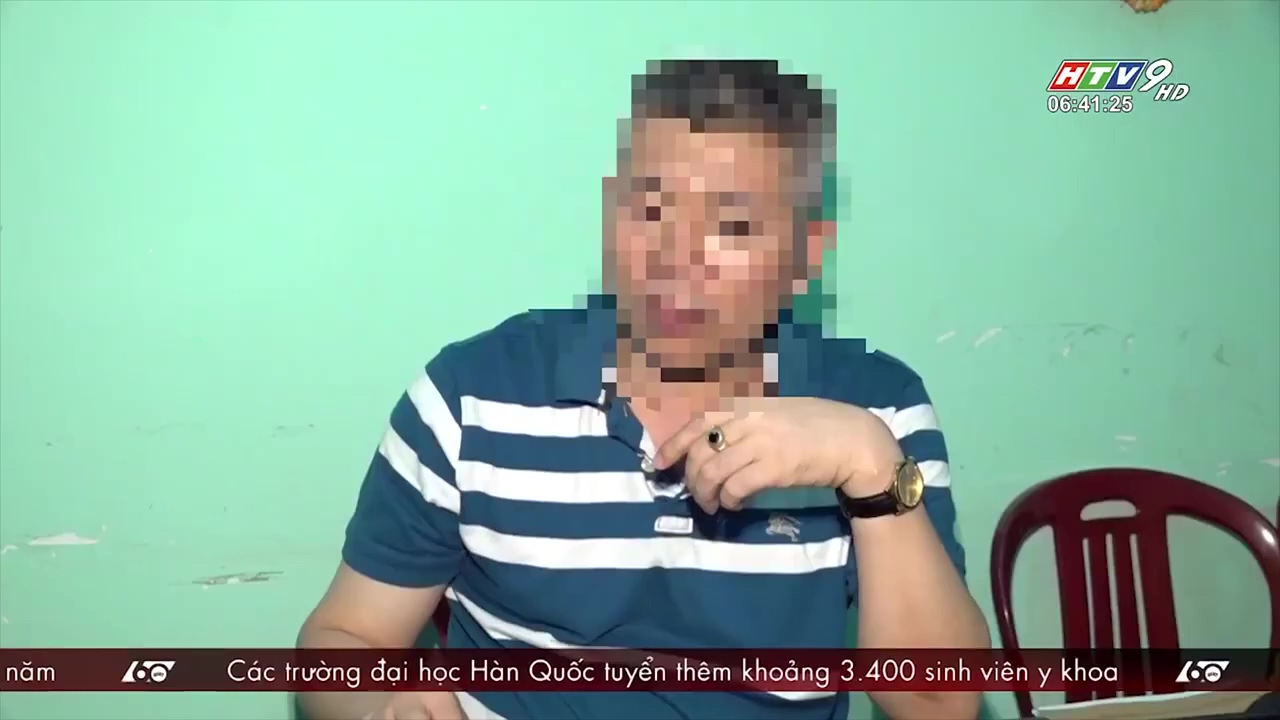

Rank 8: Folder 'L11_V007', Image '164' with similarity score 0.2348


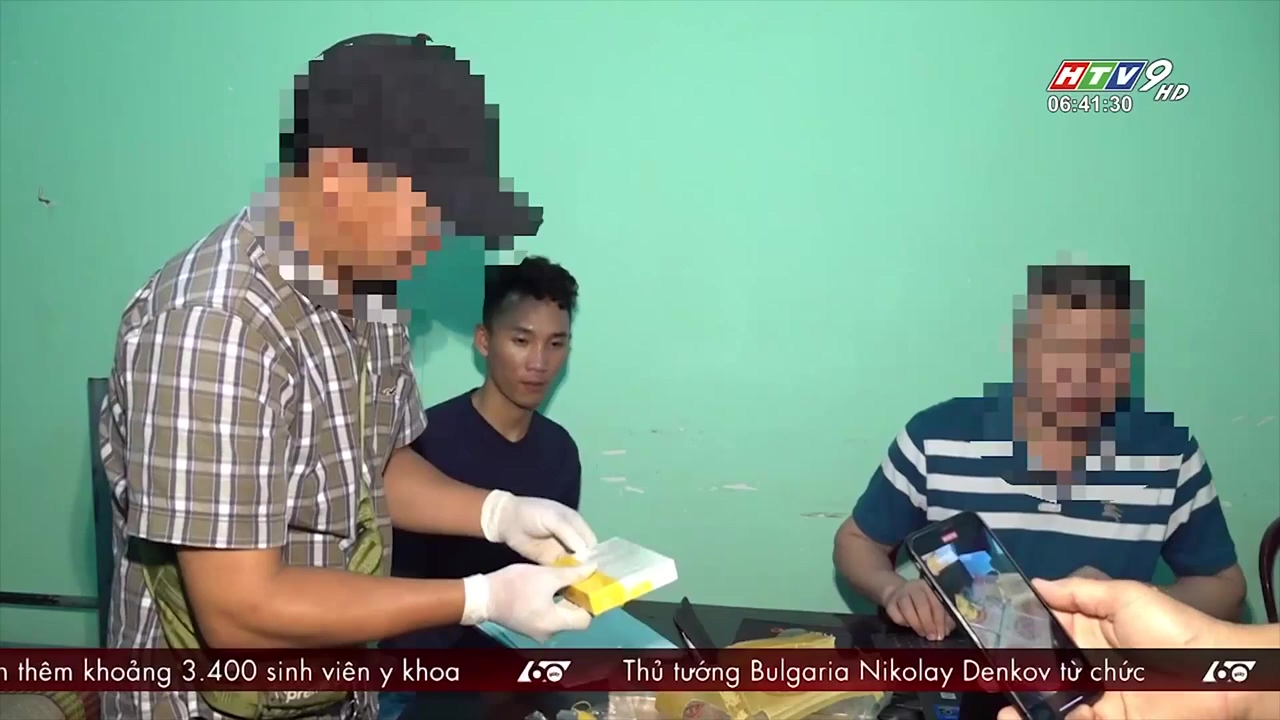

Rank 9: Folder 'L11_V007', Image '166' with similarity score 0.1936


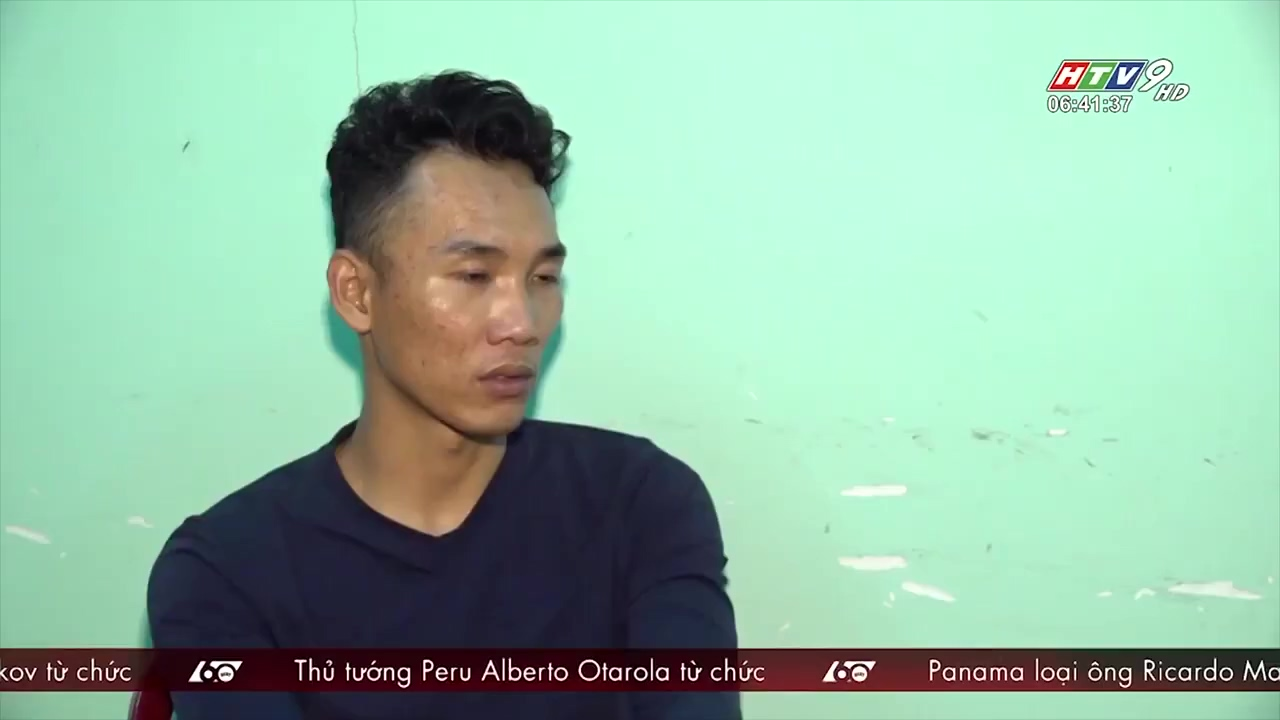

Rank 10: Folder 'L11_V007', Image '167' with similarity score 0.2063


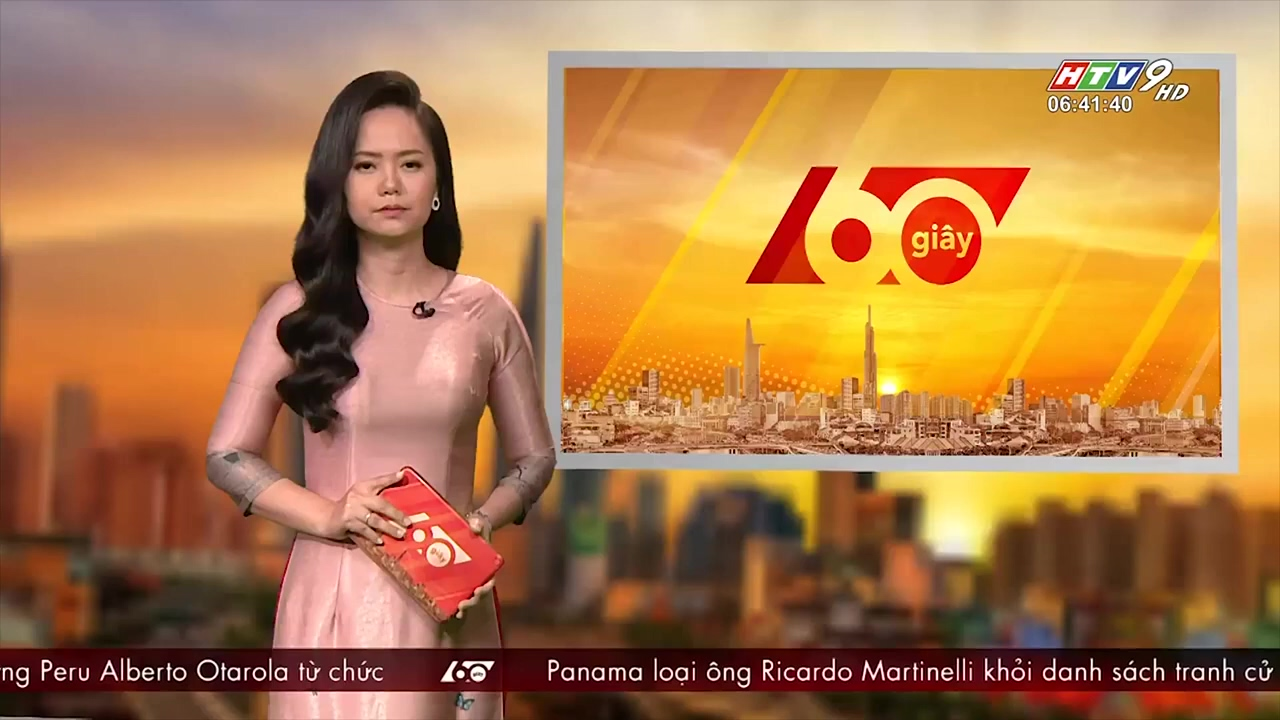

Rank 11: Folder 'L05_V028', Image '203' with similarity score 0.3097


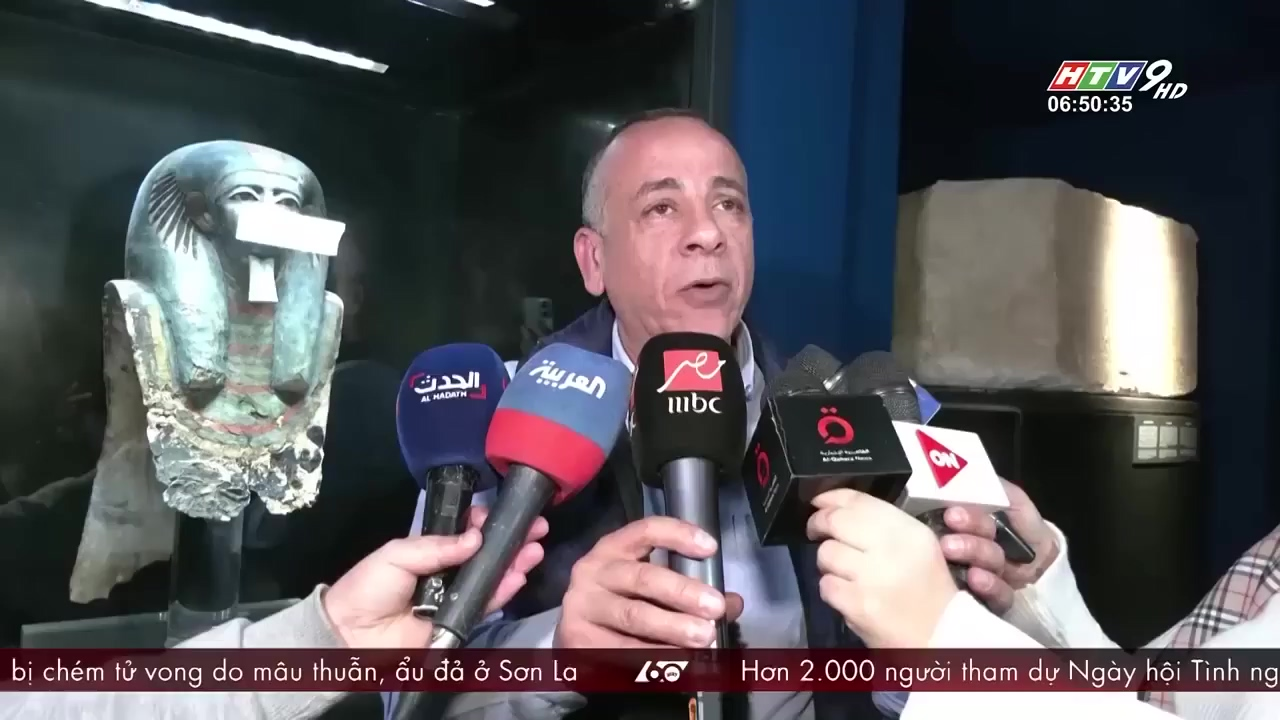

Rank 12: Folder 'L05_V028', Image '201' with similarity score 0.2139


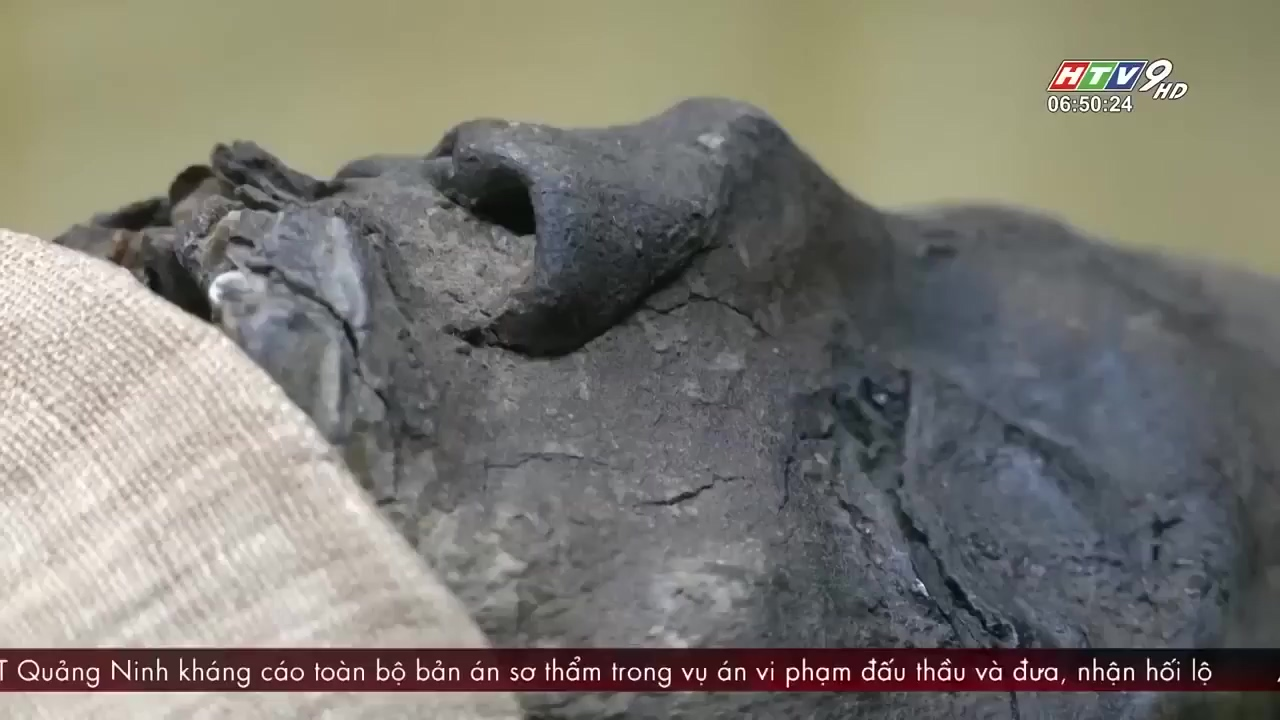

Rank 13: Folder 'L05_V028', Image '202' with similarity score 0.3042


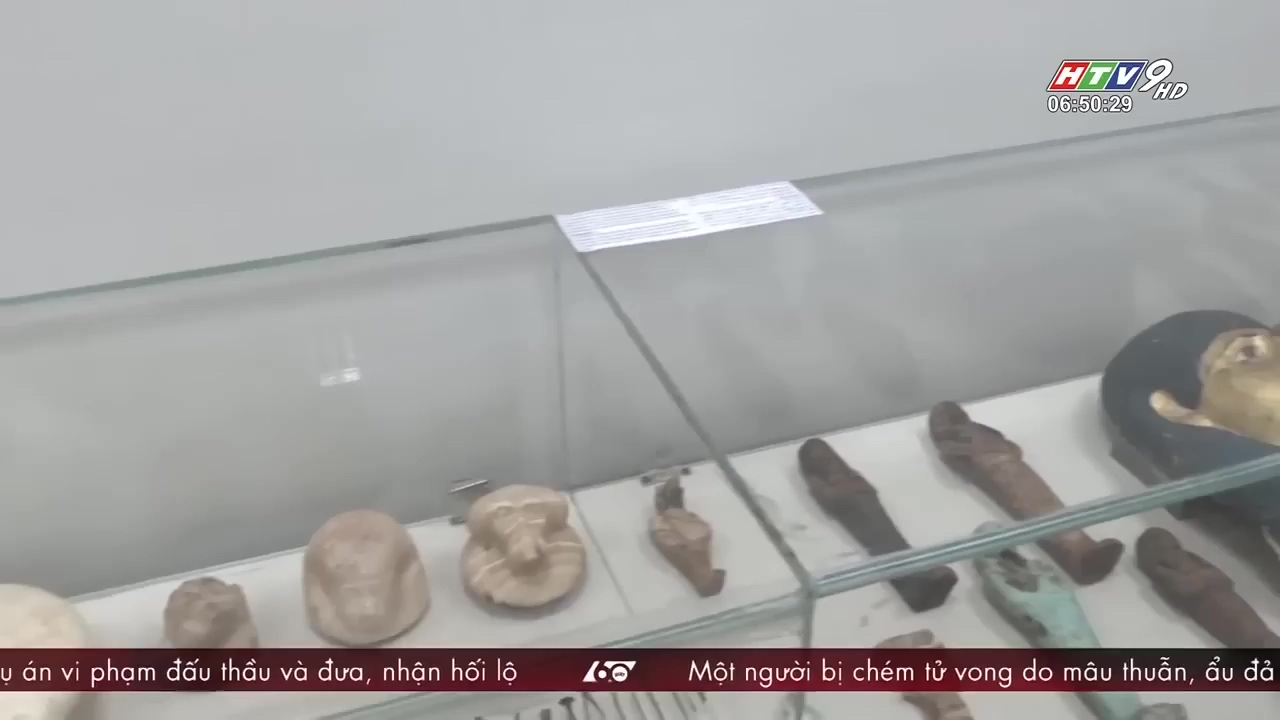

Rank 14: Folder 'L05_V028', Image '204' with similarity score 0.2153


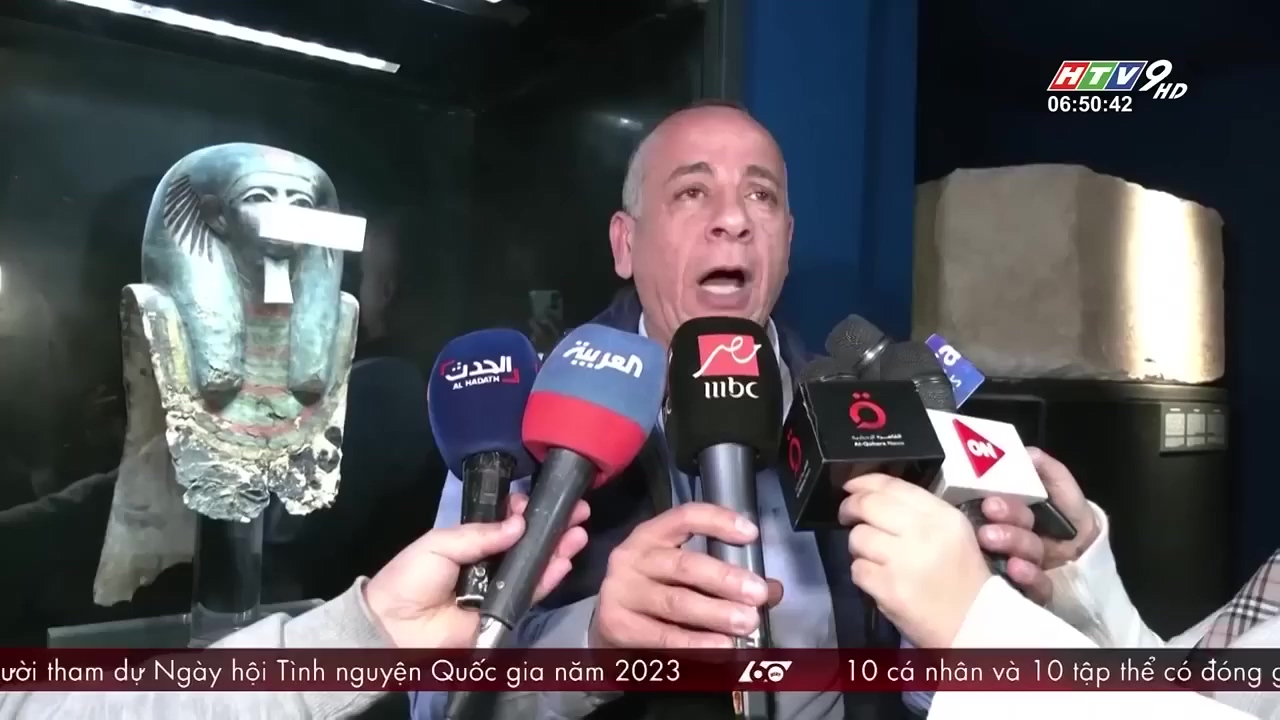

Rank 15: Folder 'L05_V028', Image '205' with similarity score 0.2406


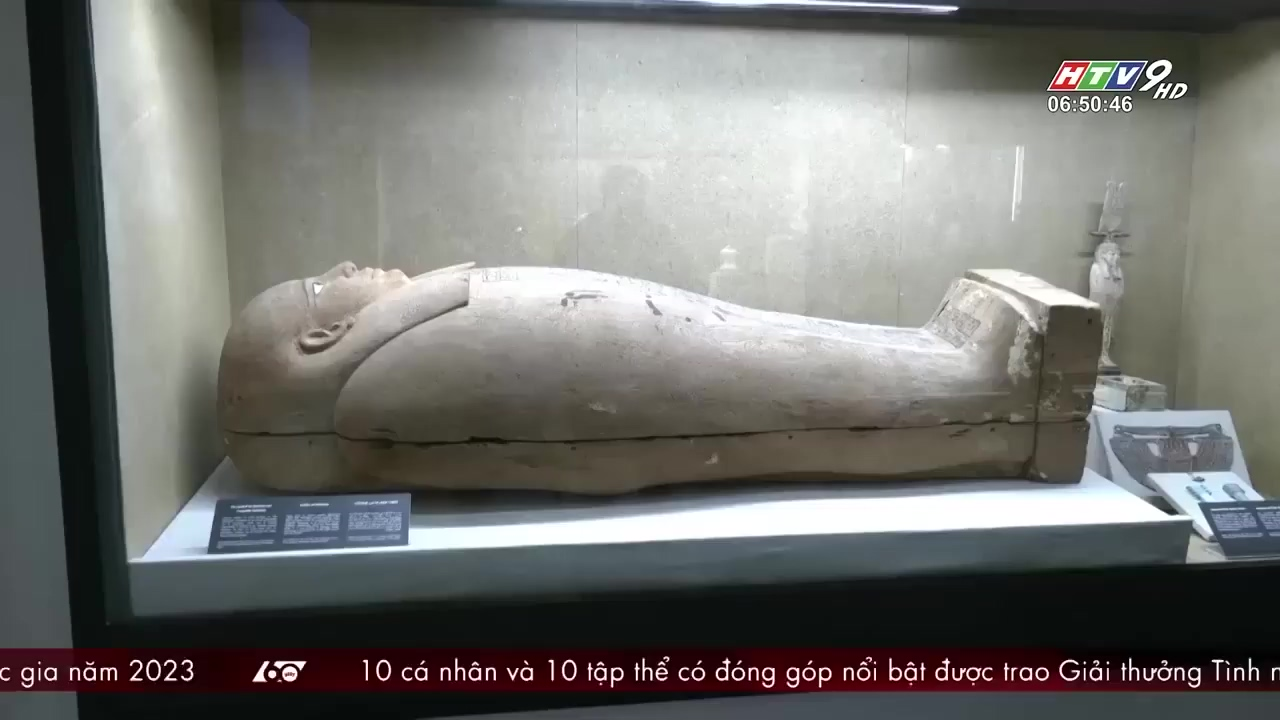

Rank 16: Folder 'L08_V006', Image '139' with similarity score 0.3093


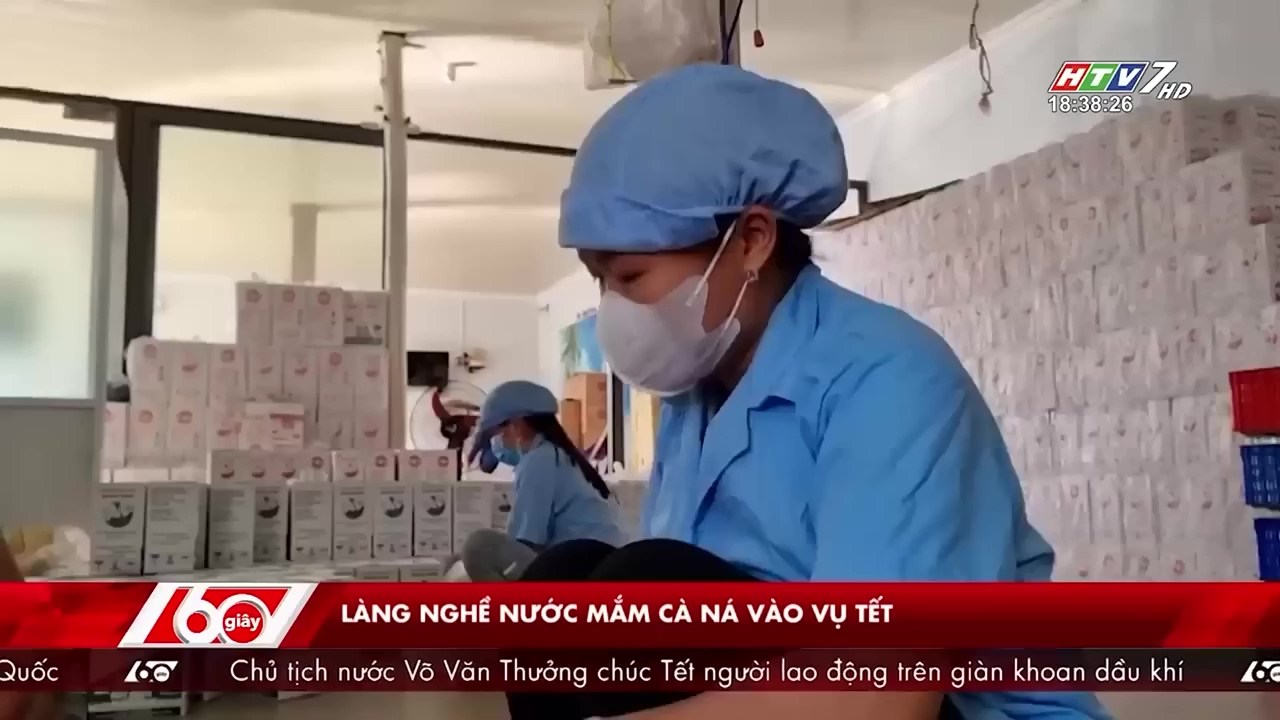

Rank 17: Folder 'L08_V006', Image '137' with similarity score 0.1637


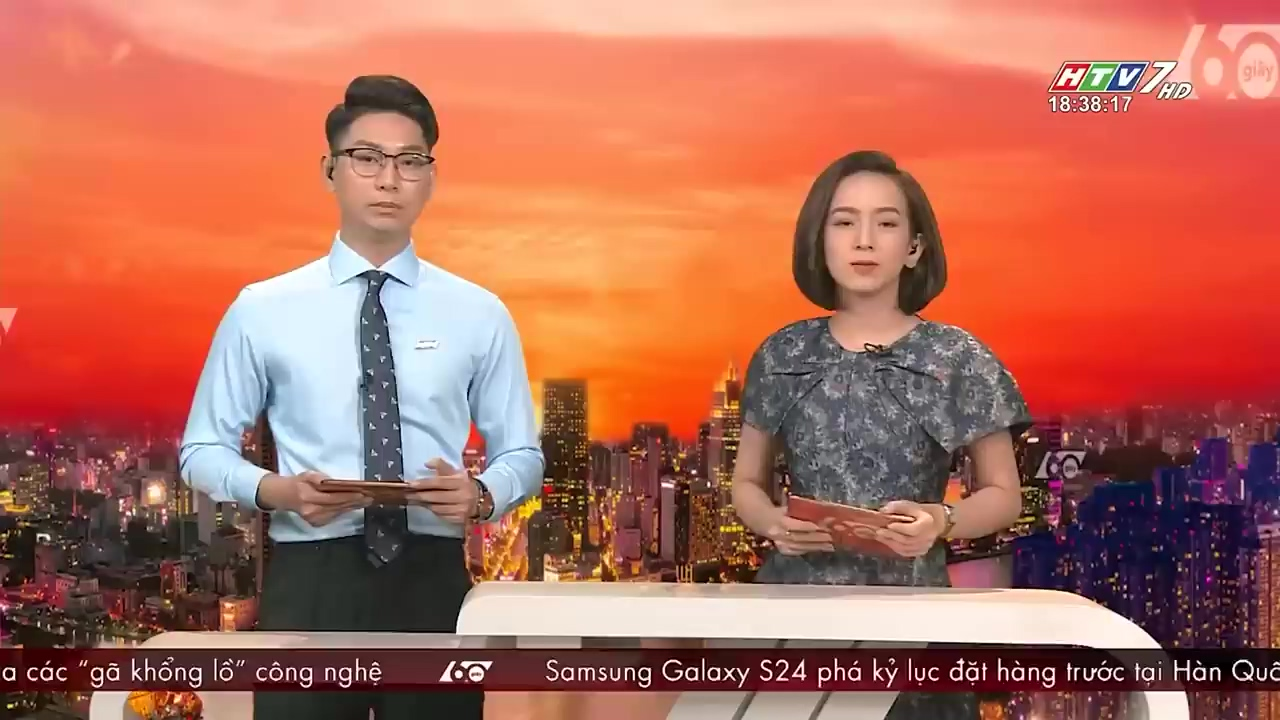

Rank 18: Folder 'L08_V006', Image '138' with similarity score 0.2164


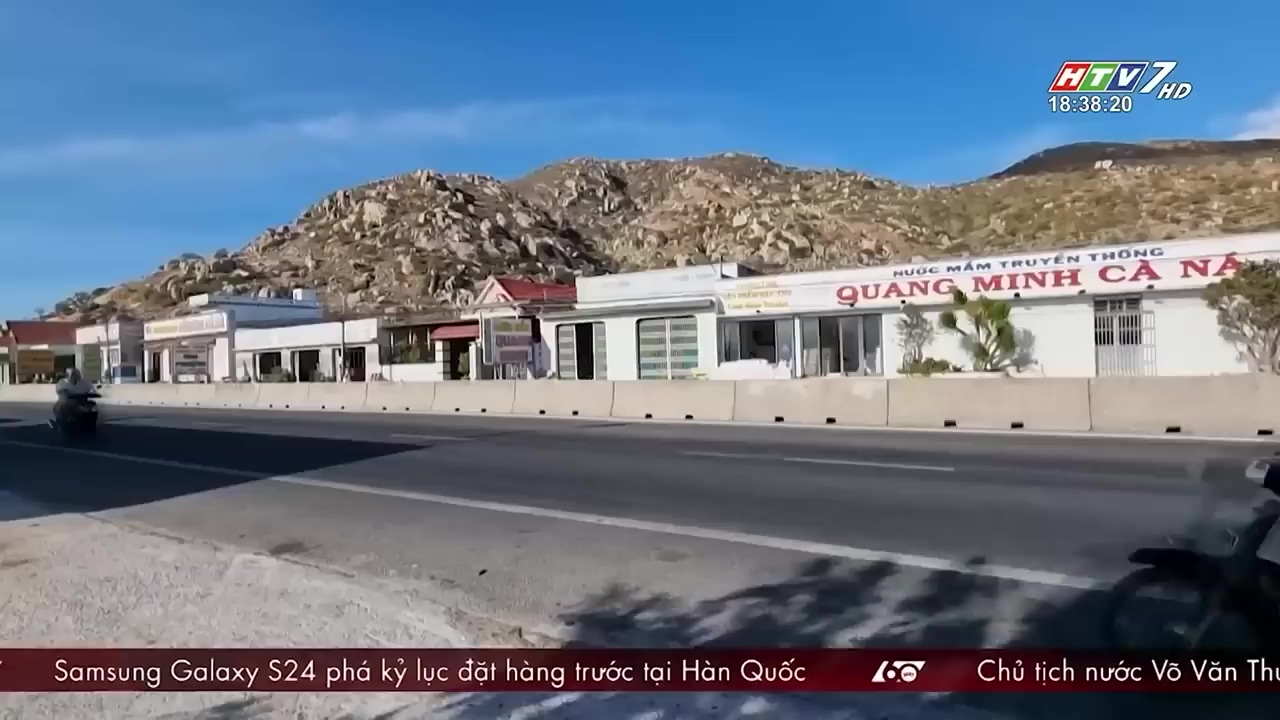

Rank 19: Folder 'L08_V006', Image '140' with similarity score 0.1847


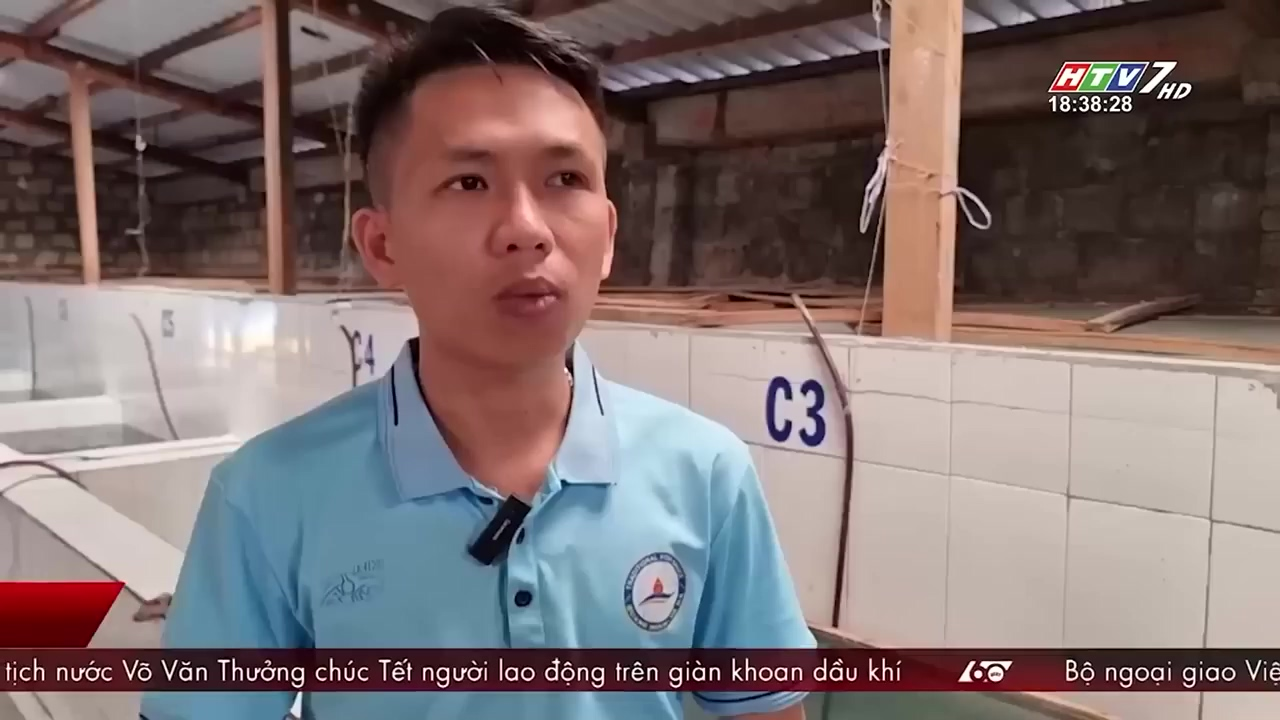

Rank 20: Folder 'L08_V006', Image '141' with similarity score 0.1312


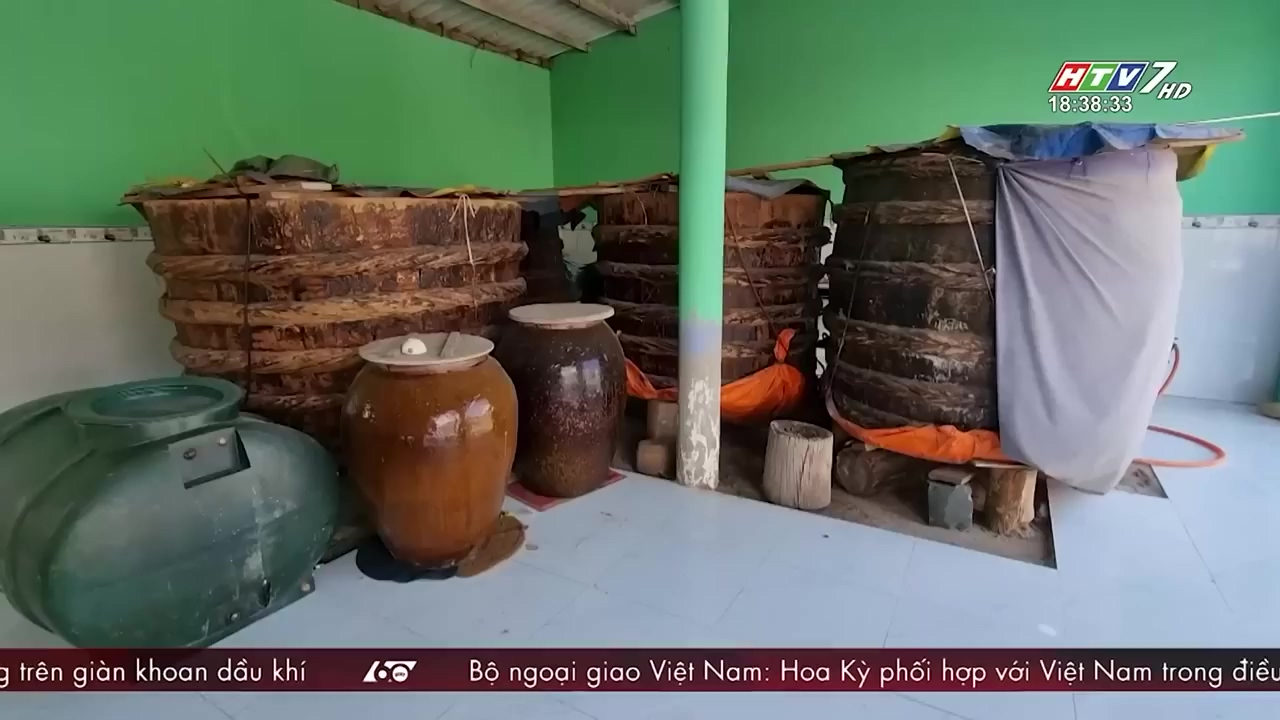

Rank 21: Folder 'L07_V020', Image '156' with similarity score 0.3046


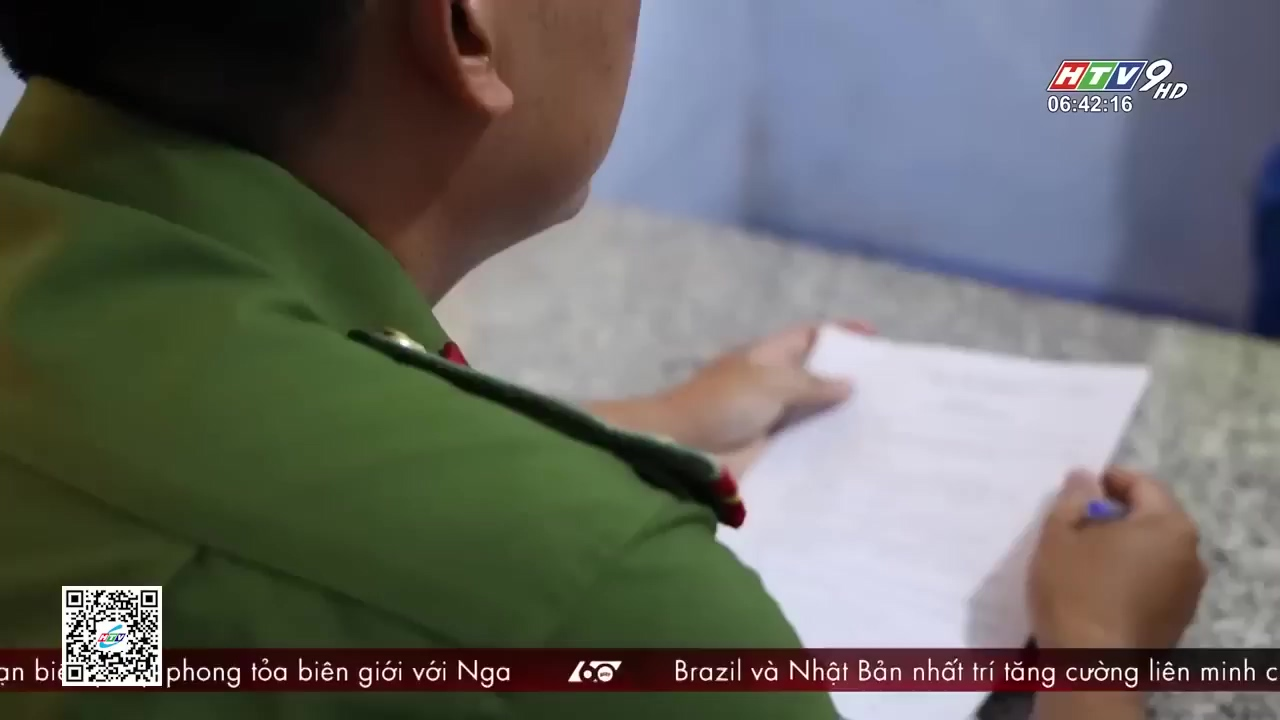

Rank 22: Folder 'L07_V020', Image '154' with similarity score 0.2898


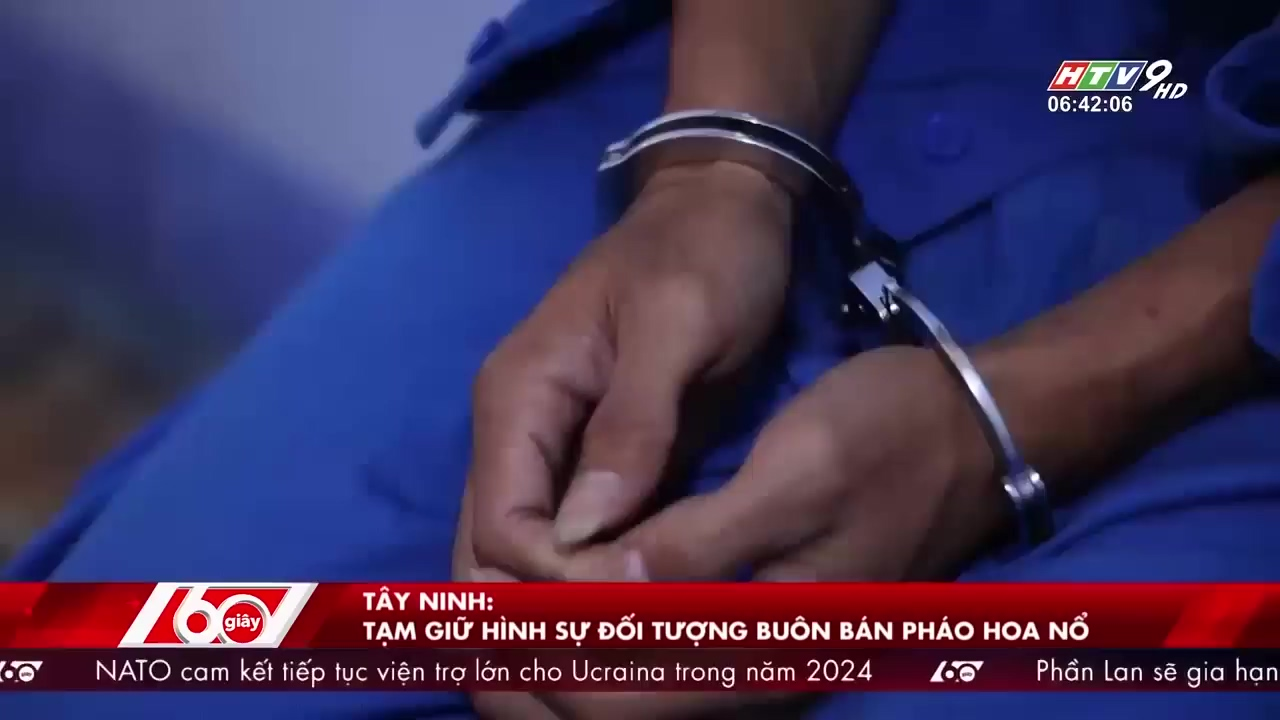

Rank 23: Folder 'L07_V020', Image '155' with similarity score 0.2333


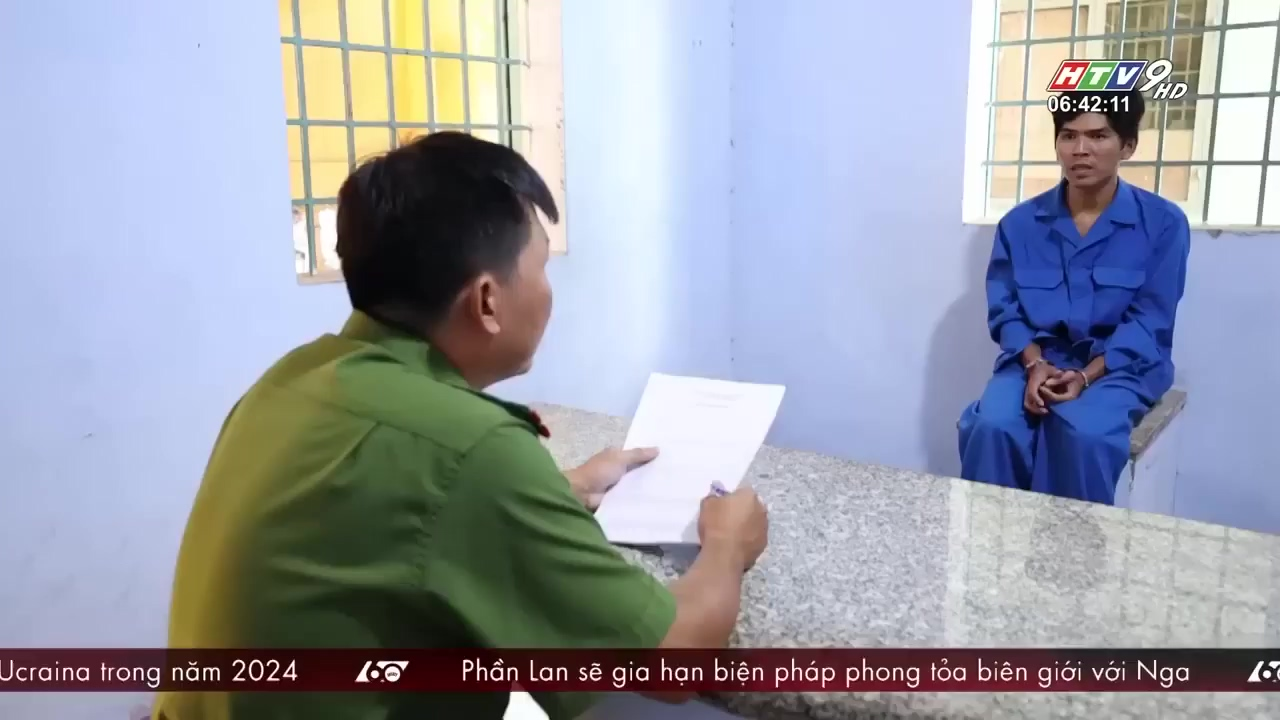

Rank 24: Folder 'L07_V020', Image '157' with similarity score 0.2295


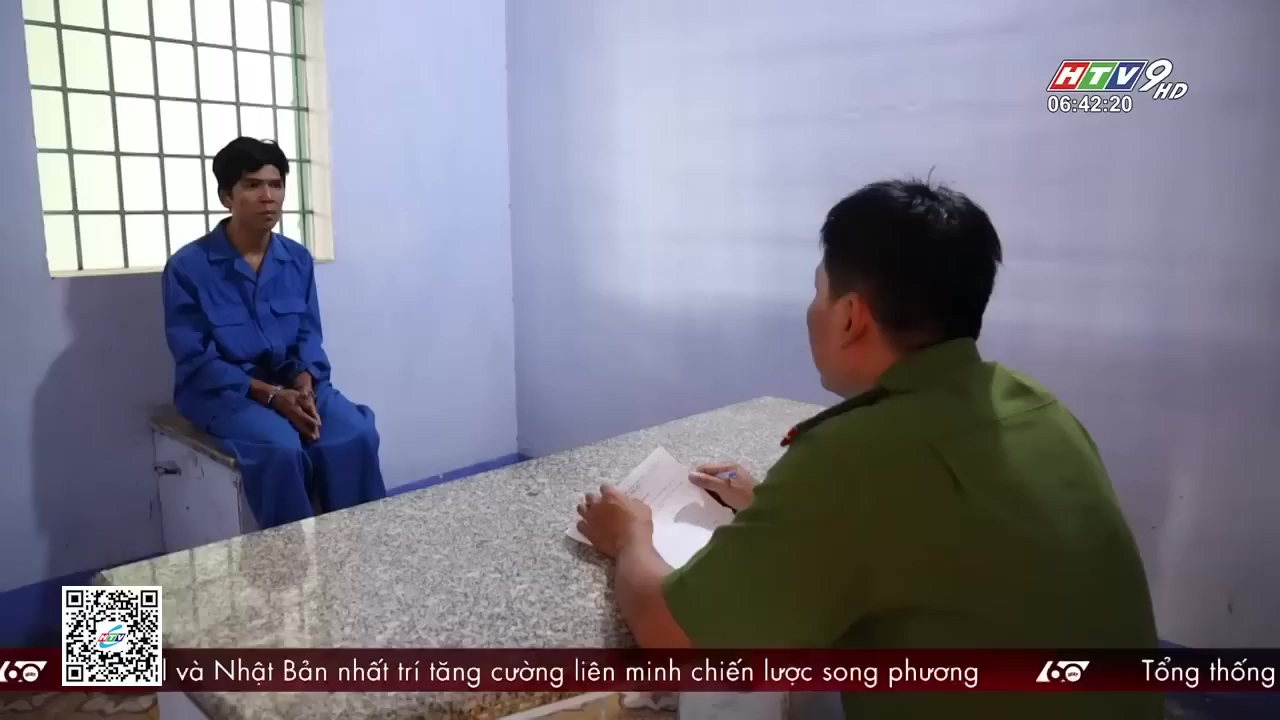

Rank 25: Folder 'L07_V020', Image '158' with similarity score 0.2772


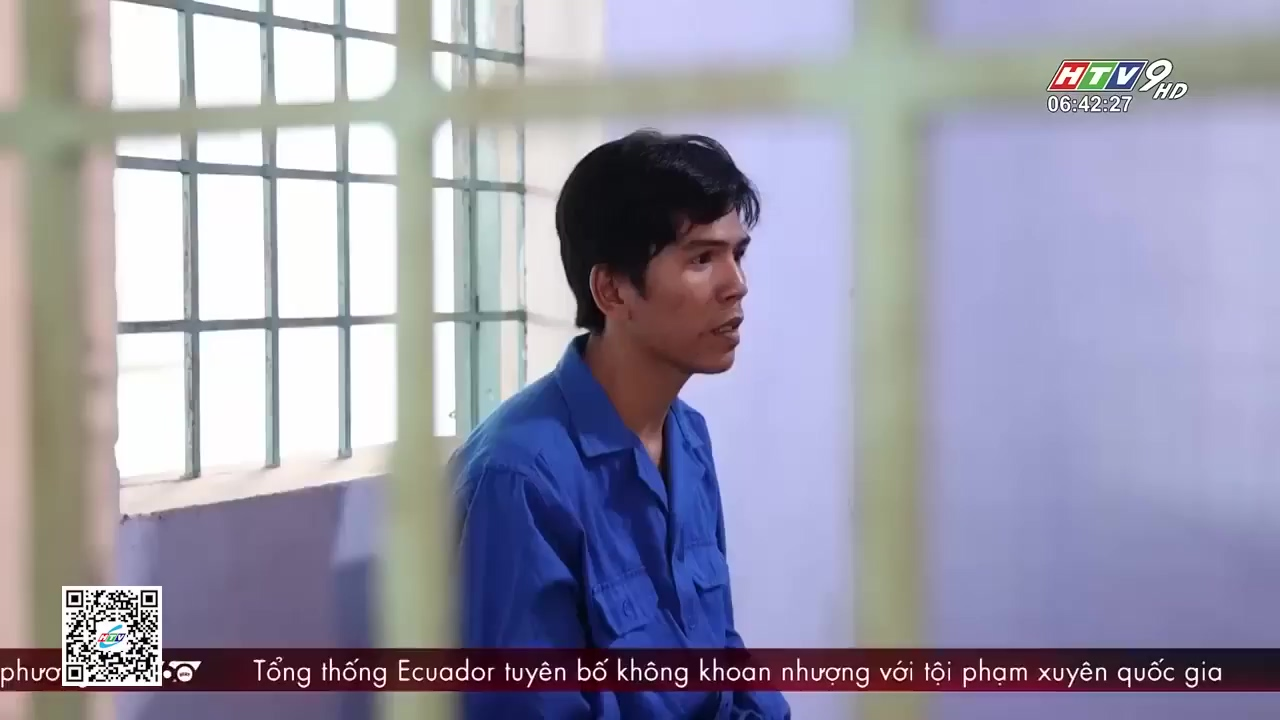

Rank 26: Folder 'L05_V028', Image '200' with similarity score 0.1959


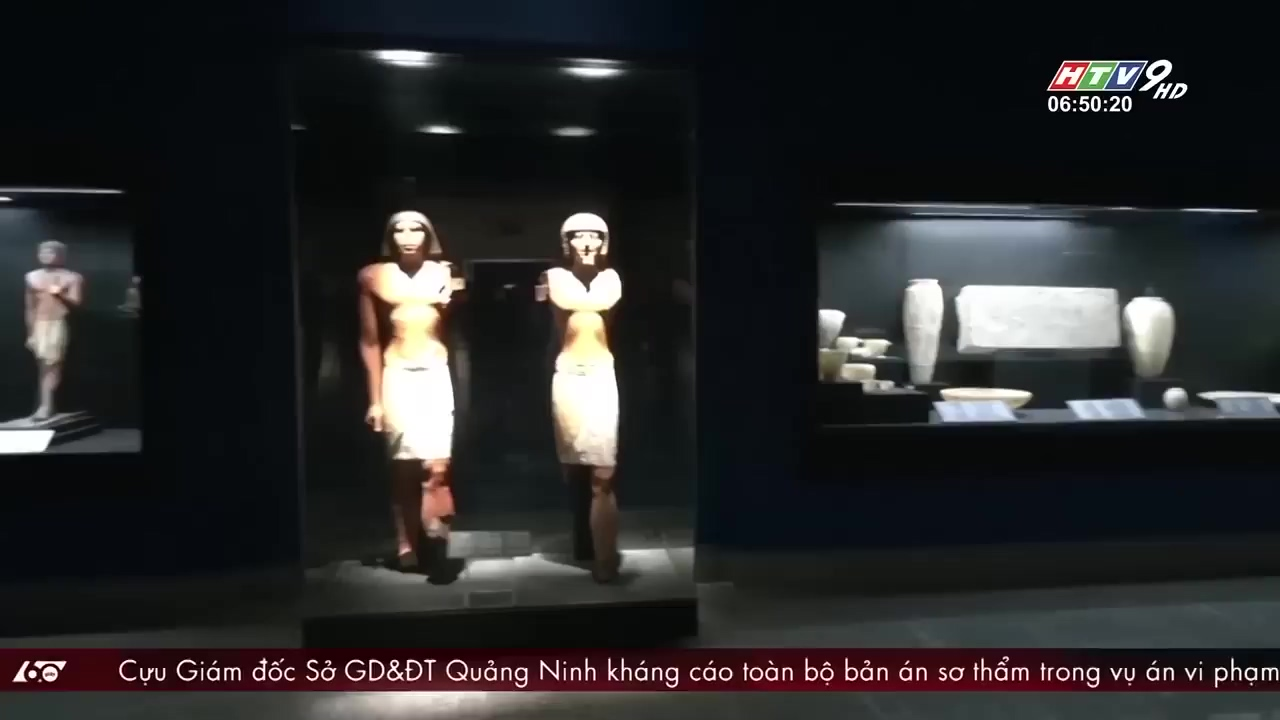

Rank 27: Folder 'L11_V007', Image '161' with similarity score 0.3030


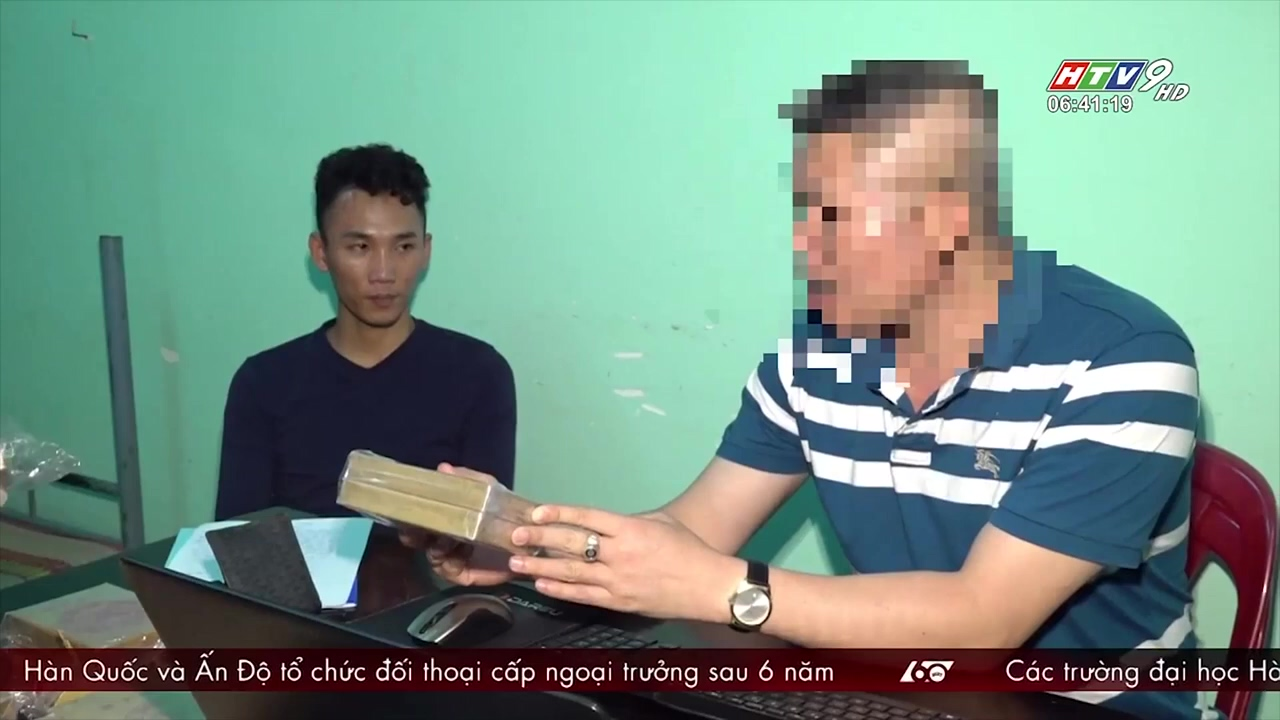

Rank 28: Folder 'L11_V007', Image '159' with similarity score 0.2662


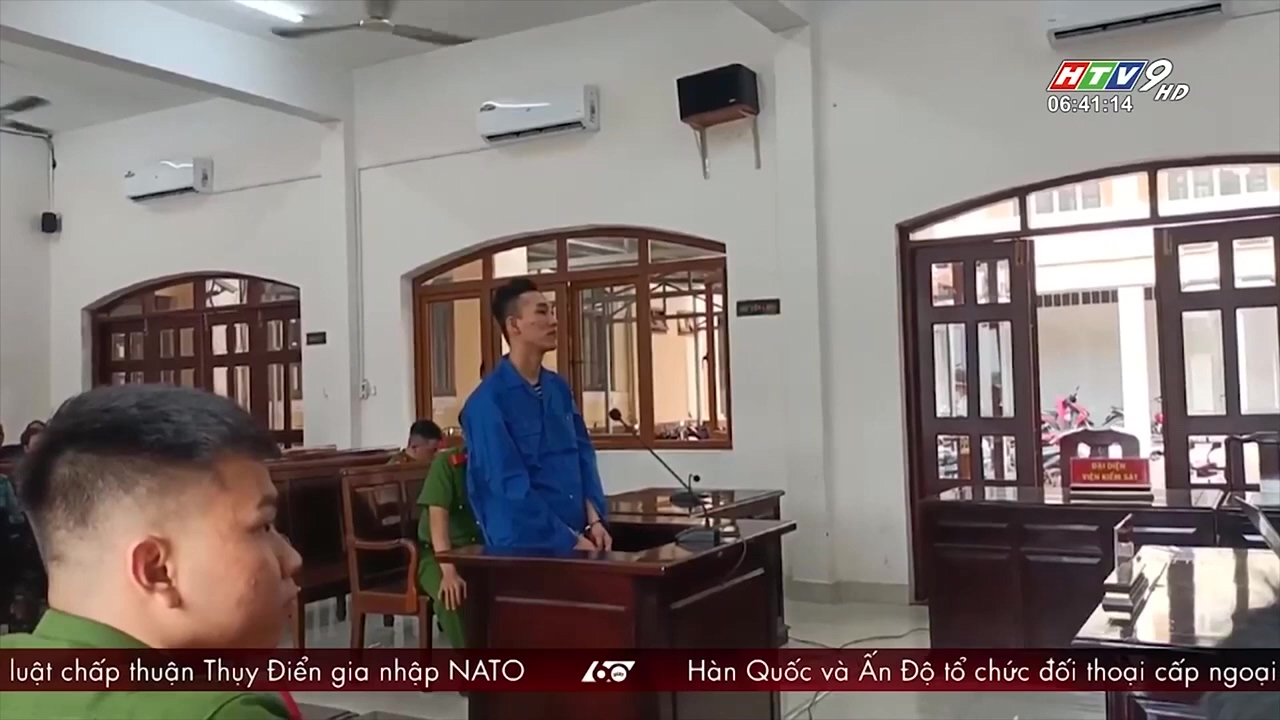

Rank 29: Folder 'L11_V007', Image '160' with similarity score 0.2671


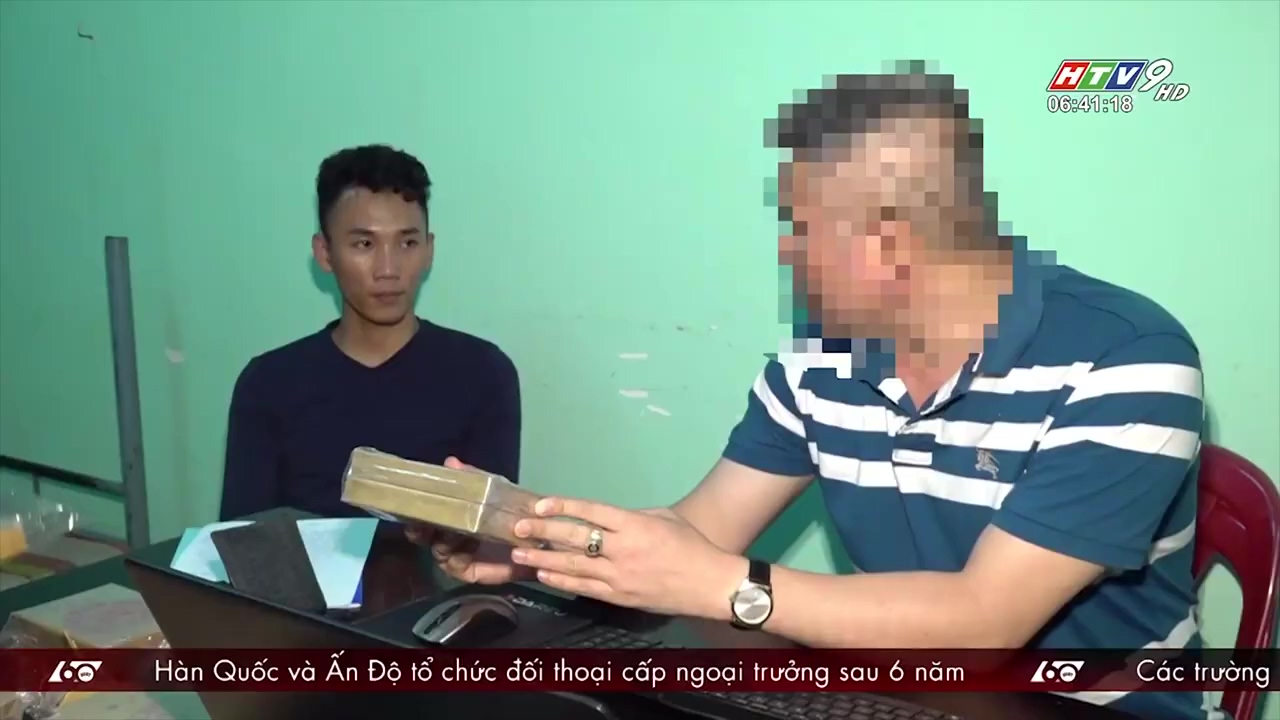

Rank 30: Folder 'L11_V007', Image '162' with similarity score 0.2621


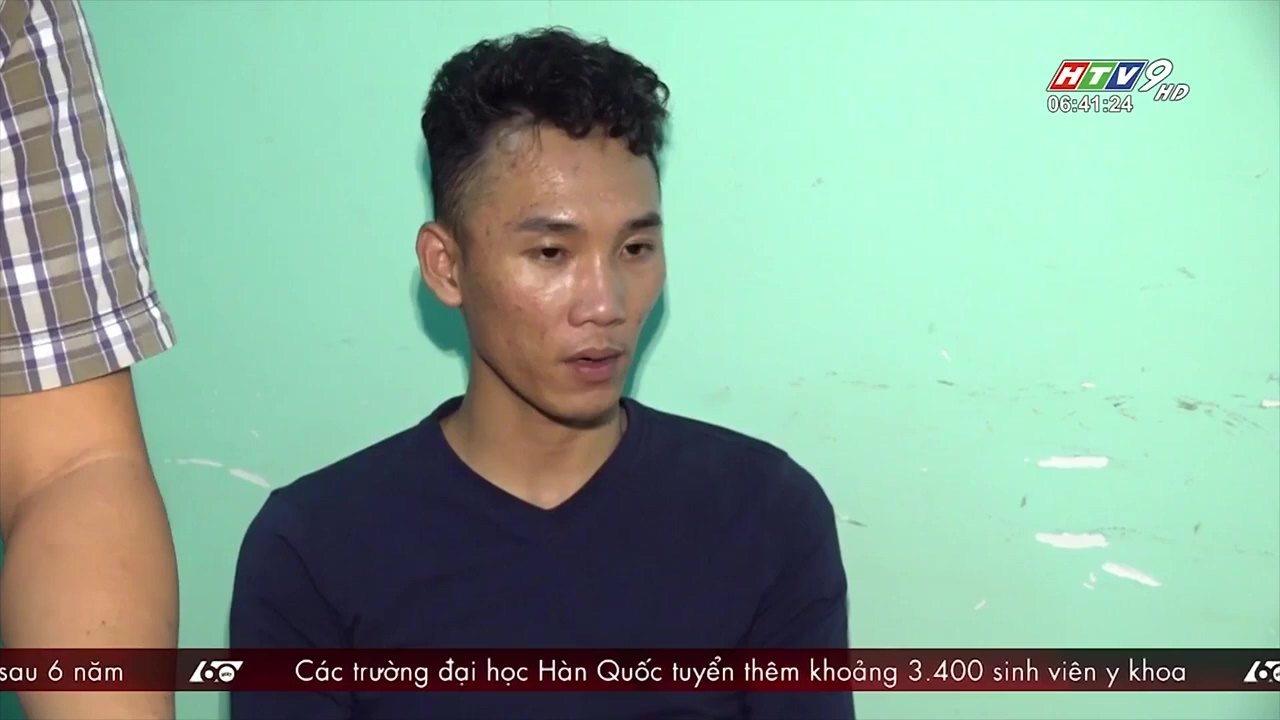

Rank 31: Folder 'L04_V018', Image '156' with similarity score 0.3030


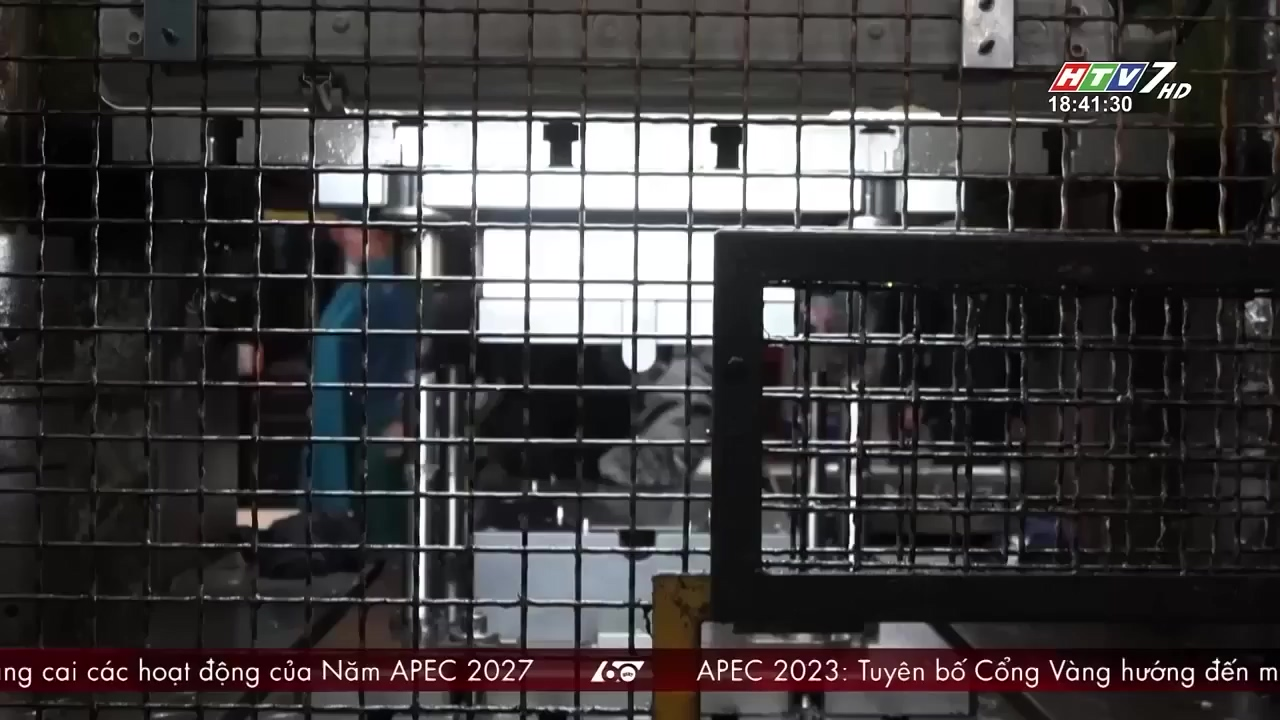

Rank 32: Folder 'L04_V018', Image '154' with similarity score 0.1836


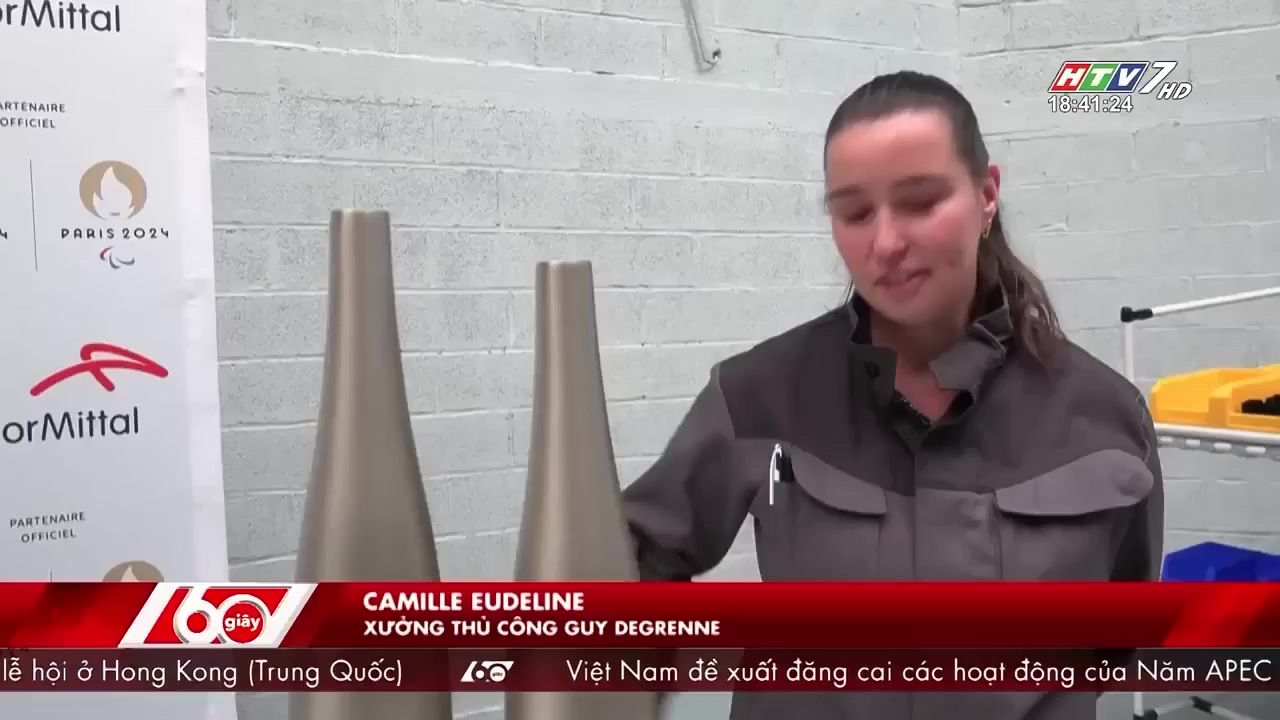

Rank 33: Folder 'L04_V018', Image '155' with similarity score 0.2050


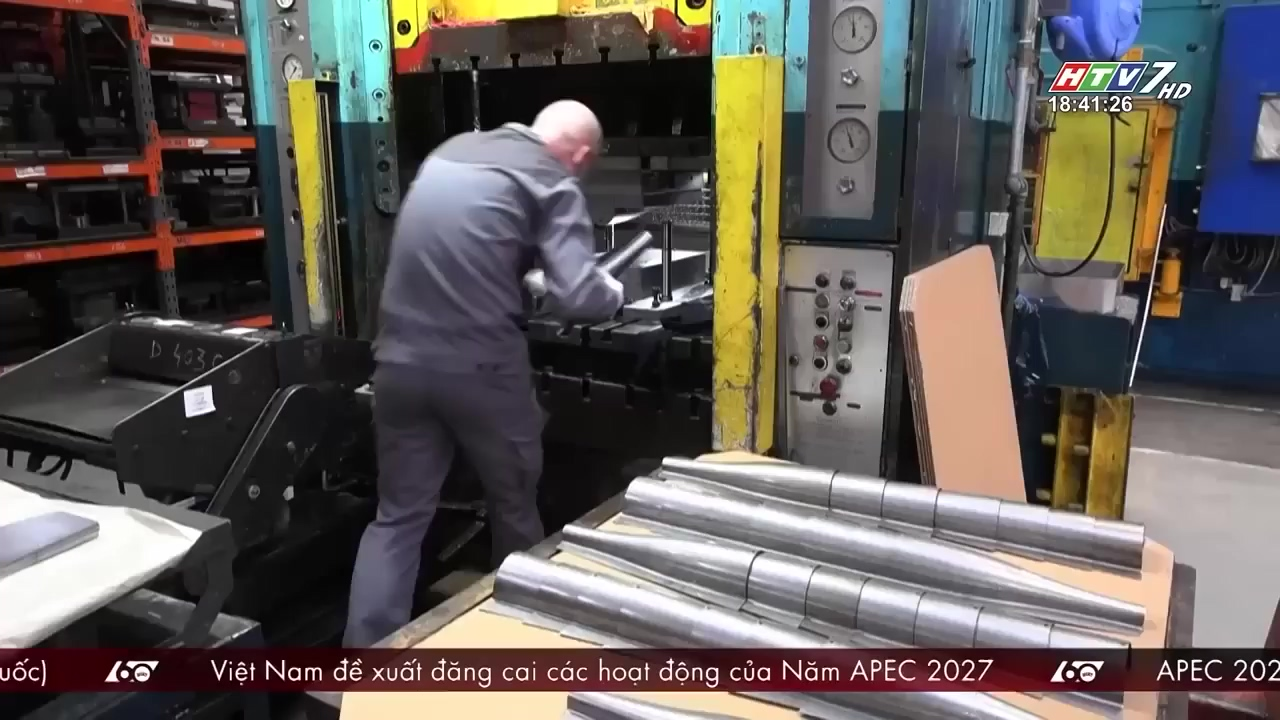

Rank 34: Folder 'L04_V018', Image '157' with similarity score 0.1786


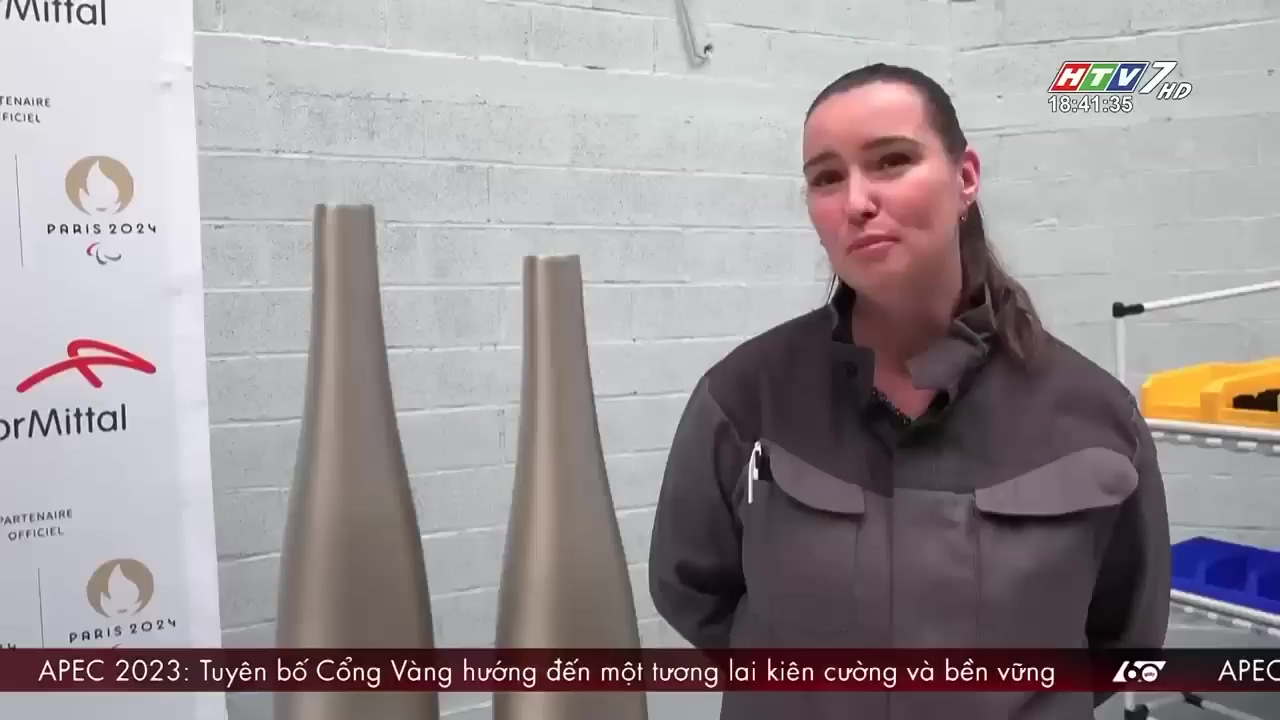

Rank 35: Folder 'L04_V018', Image '158' with similarity score 0.1739


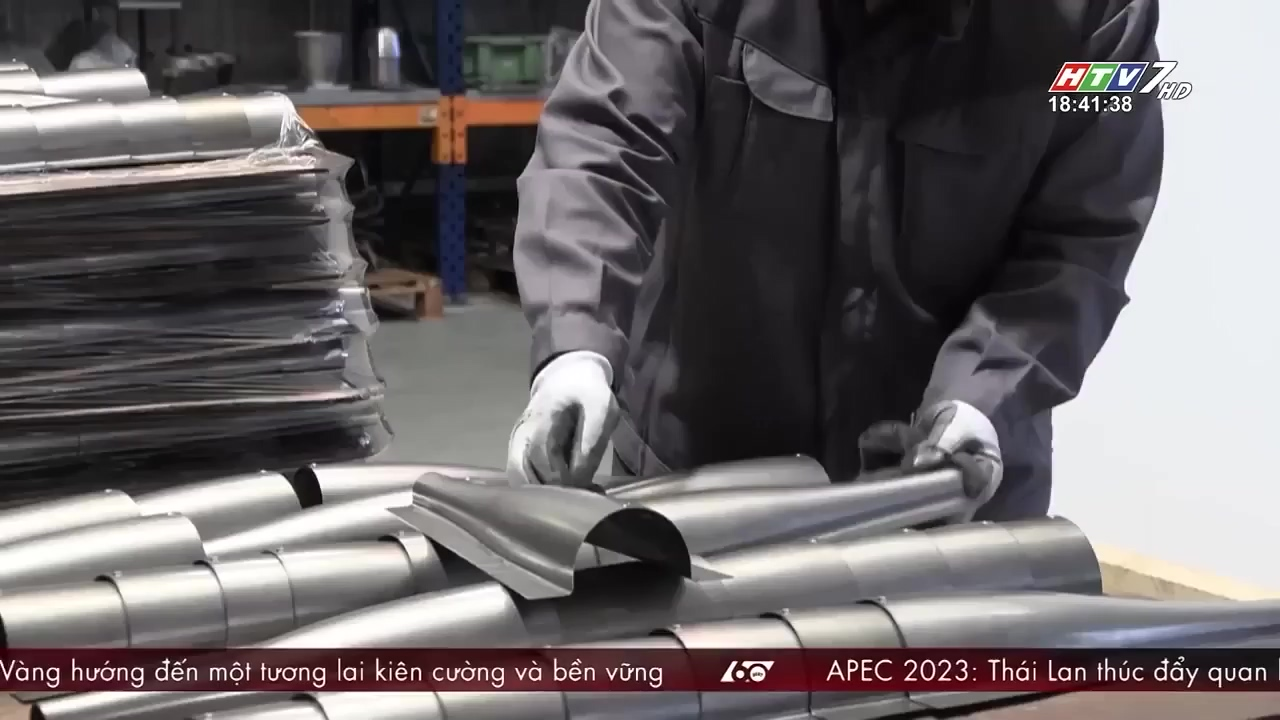

Rank 36: Folder 'L03_V014', Image '125' with similarity score 0.3017


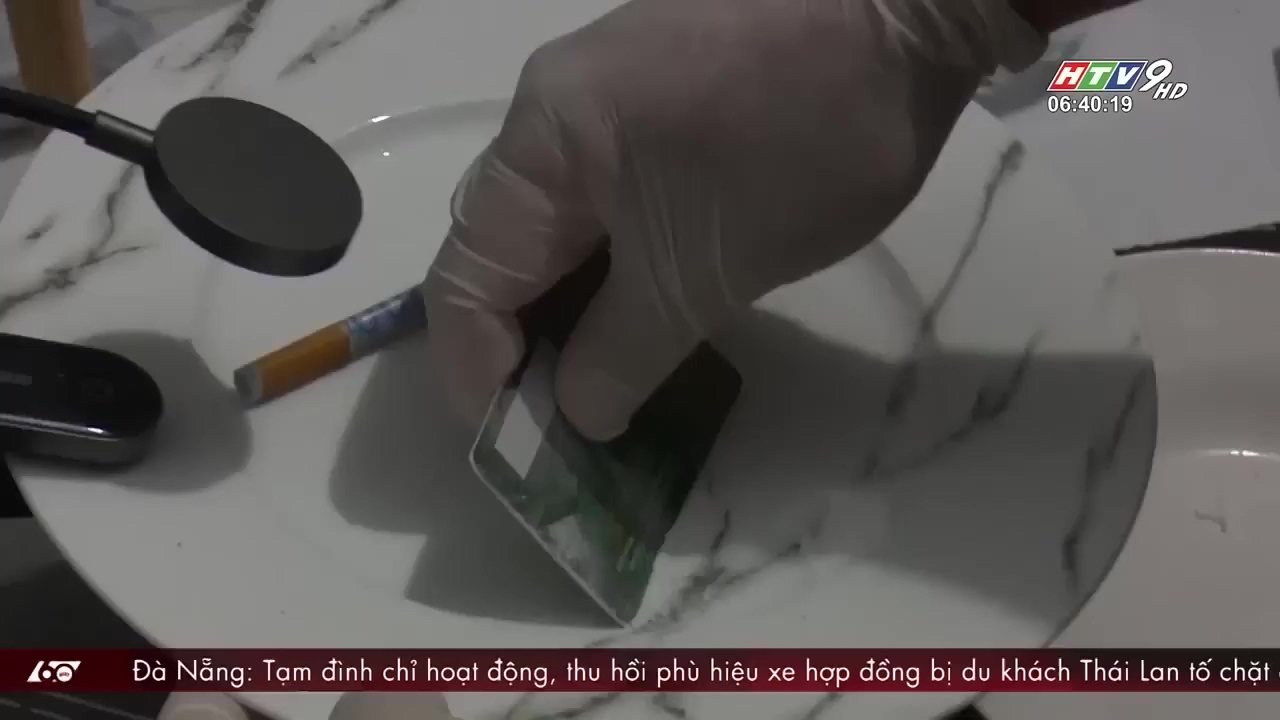

Rank 37: Folder 'L03_V014', Image '123' with similarity score 0.2221


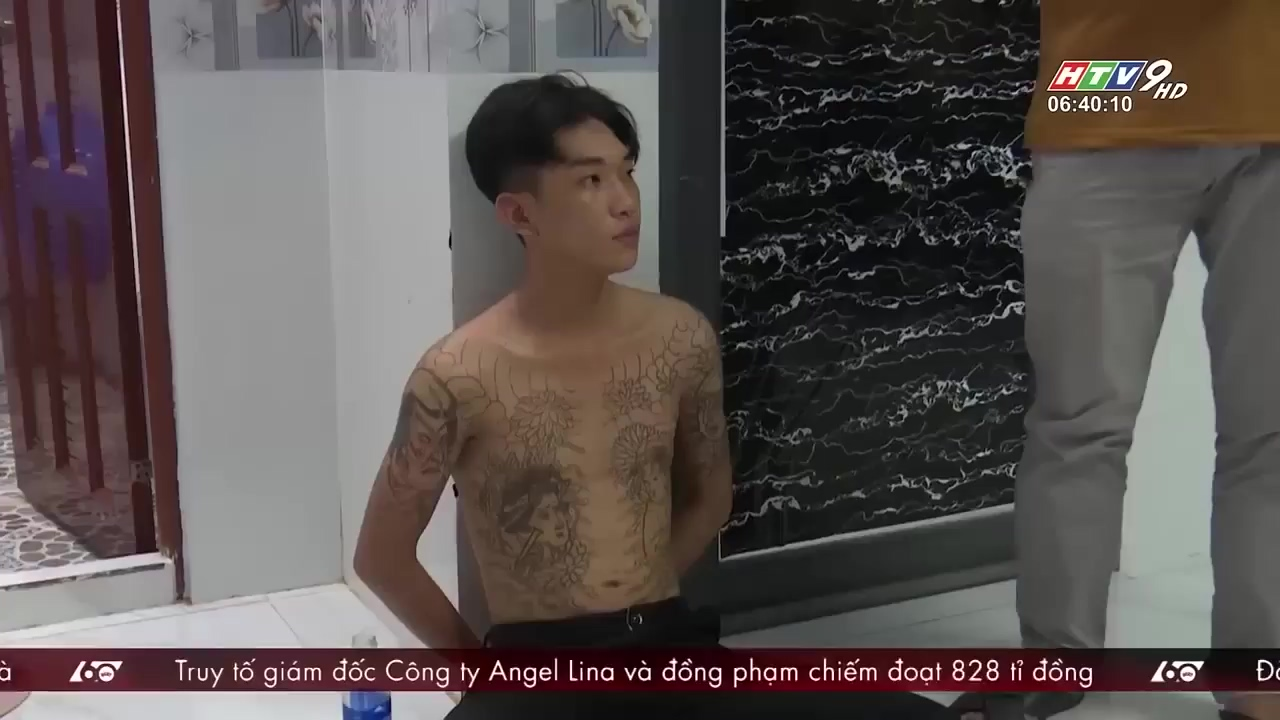

Rank 38: Folder 'L03_V014', Image '124' with similarity score 0.1809


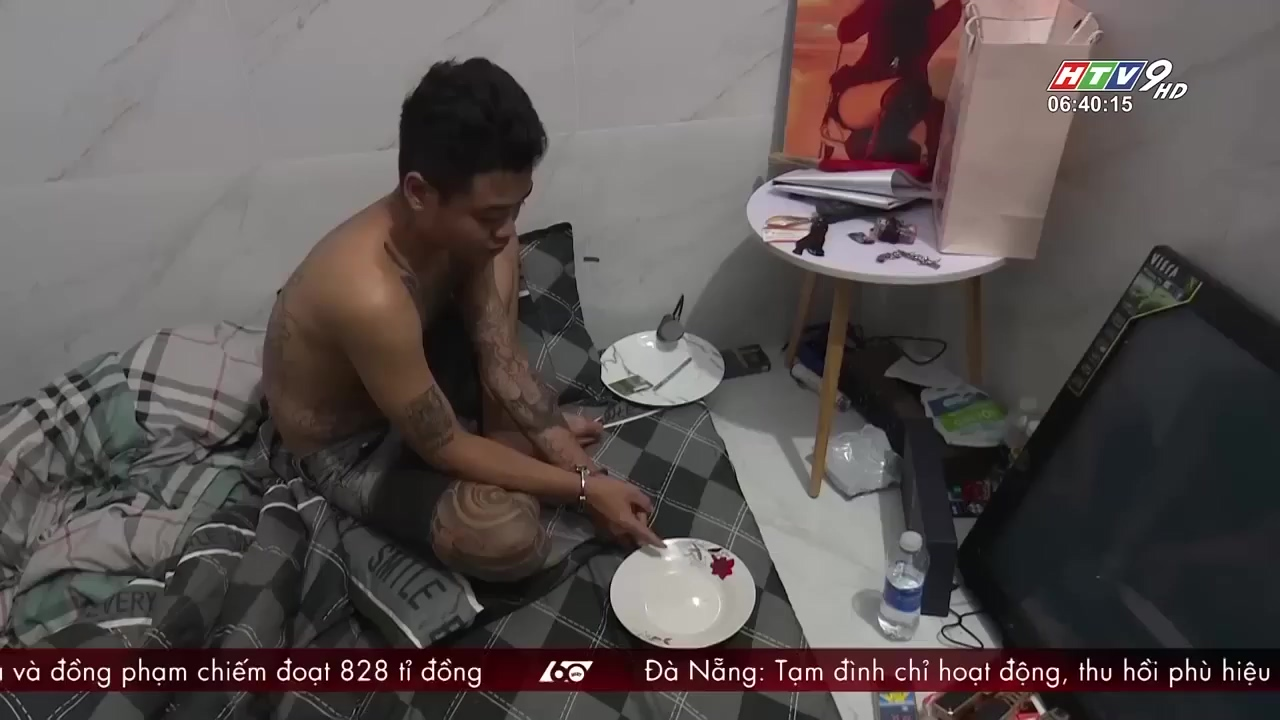

Rank 39: Folder 'L03_V014', Image '126' with similarity score 0.1824


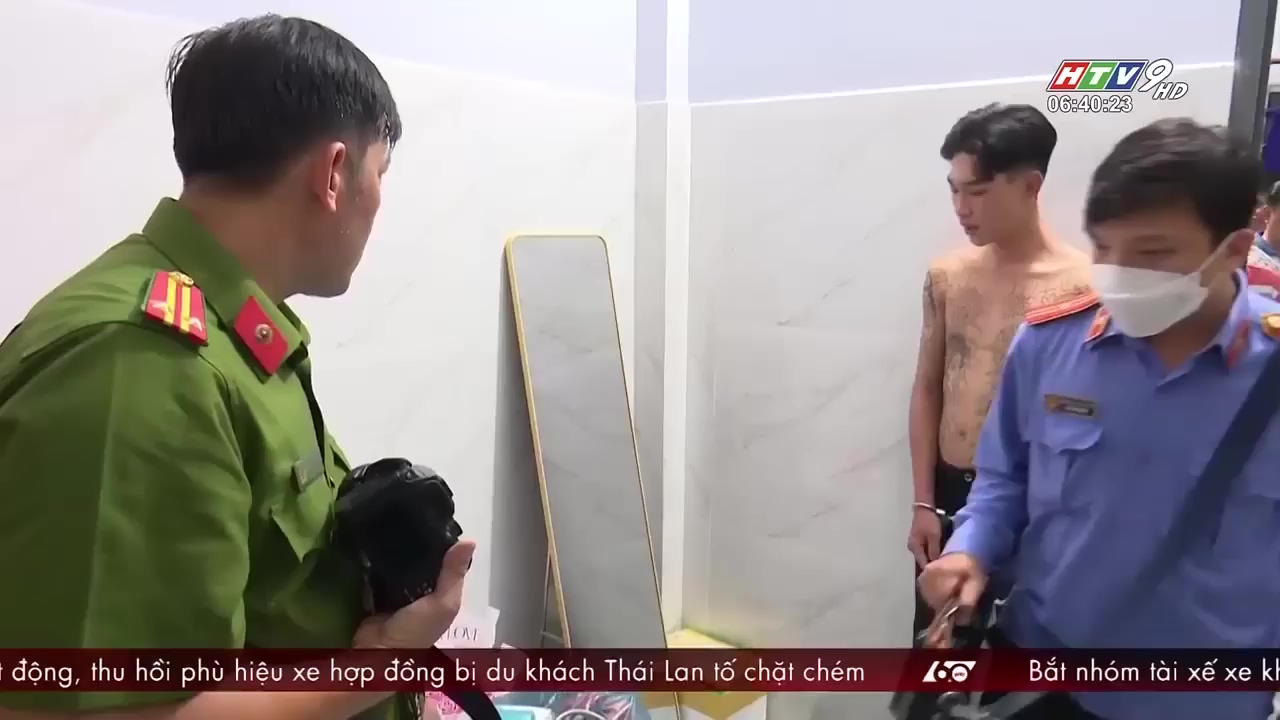

Rank 40: Folder 'L03_V014', Image '127' with similarity score 0.2218


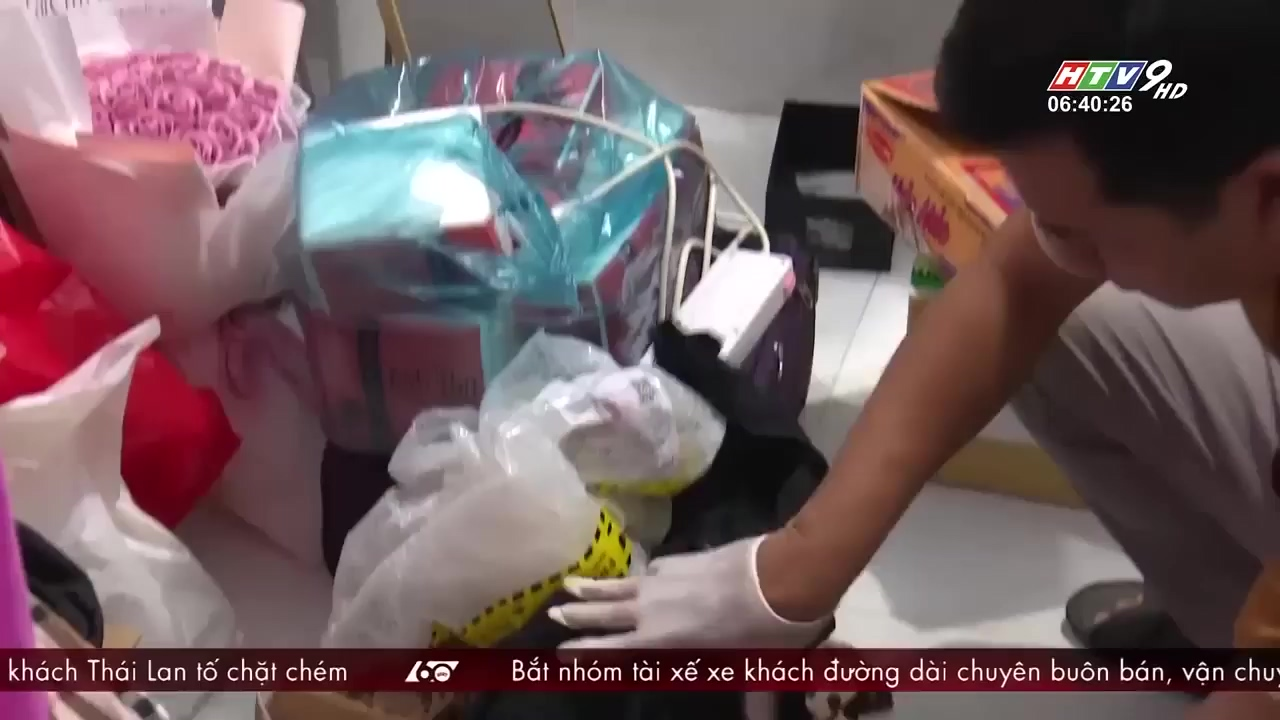

Rank 41: Folder 'L11_V030', Image '54' with similarity score 0.3016
Image file 'keyframes/L11_V030\54.jpg' does not exist.
Rank 42: Folder 'L11_V030', Image '52' with similarity score 0.1844
Image file 'keyframes/L11_V030\52.jpg' does not exist.
Rank 43: Folder 'L11_V030', Image '53' with similarity score 0.2012
Image file 'keyframes/L11_V030\53.jpg' does not exist.
Rank 44: Folder 'L11_V030', Image '55' with similarity score 0.2788
Image file 'keyframes/L11_V030\55.jpg' does not exist.
Rank 45: Folder 'L11_V030', Image '56' with similarity score 0.2922
Image file 'keyframes/L11_V030\56.jpg' does not exist.


In [5]:
# Yêu cầu người dùng nhập từ khóa, phân cách bởi dấu ";"
keywords_input = input("Nhập các từ khóa, phân cách bởi dấu ';': ")
keywords = [keyword.strip() for keyword in keywords_input.split(';')]

if keywords:
    # Chuyển đổi từ khóa thành đặc trưng văn bản
    text_features = text_to_features(keywords)

    # Tính toán độ tương đồng cosine giữa đặc trưng văn bản và đặc trưng hình ảnh
    similarities = cosine_similarity(text_features, image_features)

    # Lấy chỉ số của 50 ảnh phù hợp nhất
    top_indices = np.argsort(similarities[0])[::-1][:10]

    # Chuẩn bị danh sách ảnh để hiển thị
    display_indices = []
    for index in top_indices:
        # Thêm ảnh ưu tiên
        display_indices.append(index)
        
        # Thêm 2 ảnh ngay phía trước (nếu có)
        if index - 2 >= 0:
            display_indices.append(index - 2)
        if index - 1 >= 0:
            display_indices.append(index - 1)

        # Thêm 2 ảnh ngay phía sau (nếu có)
        if index + 1 < len(image_info):
            display_indices.append(index + 1)
        if index + 2 < len(image_info):
            display_indices.append(index + 2)

    # Loại bỏ các chỉ số trùng lặp và duy trì thứ tự xuất hiện ban đầu
    display_indices = list(dict.fromkeys(display_indices))

    # Hiển thị danh sách ảnh theo thứ tự mong muốn
    for i, index in enumerate(display_indices):
        folder_name, image_name = image_info[index]
        similarity_score = similarities[0][index]
        print(f"Rank {i+1}: Folder '{folder_name}', Image '{image_name}' with similarity score {similarity_score:.4f}")
        
        # Hiển thị hình ảnh bằng IPython.display
        img_path = os.path.join(image_folder, folder_name, image_name + ".jpg")  # Chỉ sử dụng tên ảnh là số thứ tự
        if os.path.exists(img_path):
            display(IPyImage(img_path))
        else:
            print(f"Image file '{img_path}' does not exist.")
else:
    print("Vui lòng nhập ít nhất một từ khóa.")